In [128]:
#Import Library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
#read dataset
diabetes_df = pd.read_csv('diabetes-dataset.csv')
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [130]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [131]:
#Show Data Dimension
print('Data DImension : {}'.format(diabetes_df.shape))

Data DImension : (2000, 9)


In [132]:
#Counting Outcome Classes
diabetes_df.groupby('Outcome').size()

,0
Outcome,
0,1316
1,684


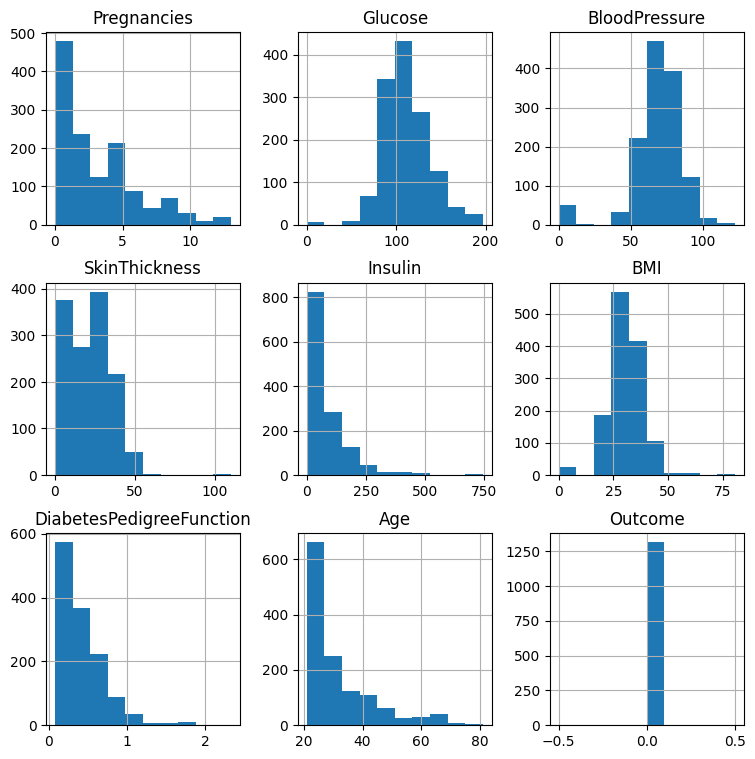

In [133]:
#Displays data per factor based on outcome = 0

# Filter data
outcome_0_df = diabetes_df[diabetes_df['Outcome'] == 0]

outcome_0_df.hist(figsize=(9, 9))
plt.show()

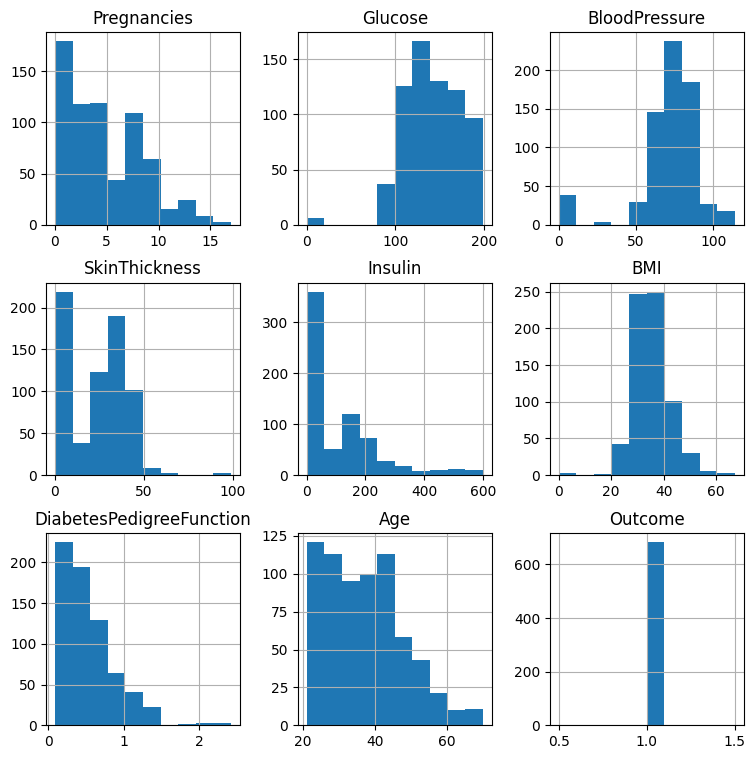

In [134]:
#Displays data per factor based on outcome = 1

# Filter data
outcome_1_df = diabetes_df[diabetes_df['Outcome'] == 1]

outcome_1_df.hist(figsize=(9, 9))
plt.show()

# Clean Data

In [135]:
#Checking null values
diabetes_df.isnull().sum()
diabetes_df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Checking Outlier

In [136]:
# Search for data where blood pressure = 0
print("Data with Blood Pressure = 0 : ", diabetes_df[diabetes_df.BloodPressure == 0].shape[0])
print("\n", diabetes_df[diabetes_df.BloodPressure == 0].groupby('Outcome')['Age'].count())

Data with Blood Pressure = 0 :  90

 Outcome
0    51
1    39
Name: Age, dtype: int64


In [137]:
# Search for data where glucose = 0
print("Data with Glucose = 0 : ", diabetes_df[diabetes_df.Glucose == 0].shape[0])

print("\n", diabetes_df[diabetes_df.Glucose == 0].groupby('Outcome')['Age'].count())

Data with Glucose = 0 :  13

 Outcome
0    7
1    6
Name: Age, dtype: int64


In [138]:
# Search for data where skin thickness = 0
print("Data with skin thickness = 0 : ", diabetes_df[diabetes_df.SkinThickness == 0].shape[0])
print("\n", diabetes_df[diabetes_df.SkinThickness == 0].groupby('Outcome')['Age'].count())

Data with skin thickness = 0 :  573

 Outcome
0    356
1    217
Name: Age, dtype: int64


In [139]:
# Search for data where BMI = 0
print("Data with BMI = 0 : ", diabetes_df[diabetes_df.BMI == 0].shape[0])
print("\n", diabetes_df[diabetes_df.BMI == 0].groupby('Outcome')['Age'].count())

Data with BMI = 0 :  28

 Outcome
0    25
1     3
Name: Age, dtype: int64


In [140]:
# Search for data where insulin = 0
print("Data with insulin = 0 : ", diabetes_df[diabetes_df.Insulin == 0].shape[0])
print("\n", diabetes_df[diabetes_df.Insulin == 0].groupby('Outcome')['Age'].count())

Data with insulin = 0 :  956

 Outcome
0    609
1    347
Name: Age, dtype: int64


## Edit Data

In [141]:
# Cleaning the data
diabetes_mod = diabetes_df[(diabetes_df.BloodPressure != 0) & (diabetes_df.BMI != 0) & (diabetes_df.Glucose != 0)]
print(diabetes_mod.shape)

(1888, 9)


In [142]:
#Split the data
factor = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabetes_mod[factor]
y = diabetes_mod.Outcome

# Training Model

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [144]:
model = LogisticRegression(random_state=0)

In [145]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=diabetes_mod.Outcome, random_state=0)

In [146]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data_scaled = sc.fit_transform(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [147]:
model.fit(train_data_scaled, y_train)

LogisticRegression(random_state=0)

In [148]:
X_test

array([[ 0.07472464,  0.86367353, -1.019538  , ..., -0.25739172,
        -0.98550642, -0.35047631],
       [-0.82197108,  0.69904027,  0.12818042, ..., -0.90290303,
        -0.66595867, -1.02729111],
       [-0.82197108,  0.43562705, -1.51141732, ..., -0.83423162,
         0.63333455,  2.44138475],
       ...,
       [-1.12086965, -0.68387913, -0.85557823, ..., -1.49347722,
        -0.42479055, -0.68888371],
       [-0.22417393, -1.07899895,  0.12818042, ..., -0.32606314,
         0.22334875,  0.41094034],
       [ 1.27031894,  0.36977375, -0.03577936, ...,  0.01729395,
        -0.62375425,  0.49554219]])

In [149]:
# Predict the probabilities on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Predict the binary outcome
y_pred = model.predict(X_test)

In [150]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [151]:
y_pred_prob

array([0.30928612, 0.21144931, 0.38539452, 0.11920948, 0.66330223,
       0.10229129, 0.05038583, 0.36178752, 0.57761606, 0.22113158,
       0.62461845, 0.09804462, 0.8443659 , 0.08467109, 0.07358902,
       0.71165377, 0.88477536, 0.16982694, 0.4563544 , 0.51414402,
       0.6850251 , 0.14831095, 0.19632117, 0.13208773, 0.34598889,
       0.85413596, 0.24158652, 0.50772266, 0.11636774, 0.06968996,
       0.04102285, 0.1719473 , 0.46372334, 0.10345429, 0.14608083,
       0.04683397, 0.65340884, 0.17260557, 0.66326721, 0.12207258,
       0.93967992, 0.5010975 , 0.17145192, 0.83204179, 0.12207258,
       0.25681122, 0.31592902, 0.25478187, 0.46372334, 0.85413596,
       0.56194672, 0.13177222, 0.57596428, 0.34096758, 0.80418487,
       0.30534352, 0.05805552, 0.33243024, 0.69115859, 0.09227383,
       0.06567374, 0.14149317, 0.17337911, 0.70665663, 0.37789221,
       0.13161735, 0.01979785, 0.19739299, 0.16447201, 0.05805552,
       0.1076977 , 0.33853438, 0.41123448, 0.07266877, 0.75613

In [152]:
#Prediction Test
model.predict([[2,100, 72, 25, 78, 30.0, 0.22, 19]])[0]

1

# Model Evaluation

In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [154]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[272  40]
 [ 73  87]]


In [155]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.760593220338983


In [156]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6850393700787402


In [157]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.54375


In [158]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6062717770034843


In [159]:
print("Model Score:", model.score(X_test, y_test))

Model Score: 0.760593220338983


# Save ML Model

In [160]:
import joblib

In [161]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

In [162]:
joblib.dump(model, 'diabetes_prediction.pkl')

['diabetes_prediction.pkl']